Sigmoid neuron

$S_{w,b}(x) = \frac{1}{1 + e^{-(w^Tx + b)}}$

Text(0.5, 0, 'y')

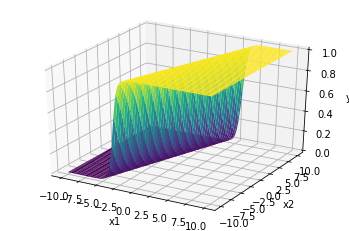

In [129]:
#Plotting 2d sigmoid
from mpl_toolkits import mplot3d
import matplotlib.colors

def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)
w1 = 3
w2 = -1
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)
XX1, XX2 = np.meshgrid(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook


#Loading the dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

X = breast_cancer.data   #input data
Y = breast_cancer.target #classes corresponding to the data

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) #Converting the data into pandas dataframe
data['class'] = breast_cancer.target                                         #formation of class column

#Splitting of data
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
Y = data['class']  #separating class from the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y) #division of dataset into test and training data maintaining the reproducibility of data(random_state)

#standardization of data into mean=0 and std.deviation=0
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)#transforming test data using the parameters of training data

In [ ]:
#sigmoid neuron class
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y): #gradient w.r.t weights
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):#gradient w.r.t b
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
      L=[]
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"): #tqdm for progress bar
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)   
      self.w -= learning_rate * dw  #performing gradient descent algorithm
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
        L.append(loss[i])
    
    if display_loss:
      plt.plot(L)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [ ]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


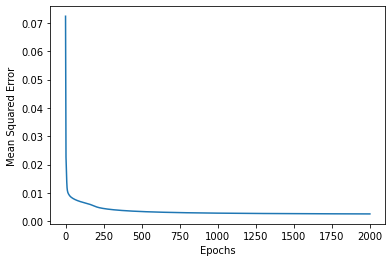

In [ ]:
sn.fit(X_scaled_train, Y_train, epochs=2000, learning_rate=0.2, display_loss=True)

In [ ]:
Y_pred_test = sn.predict(X_scaled_test) #prediction of 
column_value = ['class']
Y_pred_test1 = pd.DataFrame(data = Y_pred_test,columns = column_value) #conversion of numpy data to pandas dataframe
Y_pred_test2 = Y_pred_test1.apply(pd.cut, bins=2, labels=[0,1]) #binarisation of test data

In [ ]:
accuracy_test  = accuracy_score(Y_pred_test2,Y_test) # accuracy of test data

In [ ]:
accuracy_test

0.951048951048951